In [2]:
# Importing  libraries:

import numpy as np
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle
#from dbcv import *
from sklearn.cluster import KMeans

STEPS:

1) gather_user_song (input())

2) get_user_song_ids(limit=5)

3) show_matches_to_the_user()

4) get_user_song_audio_features()

5) scale_user_song_audio_features() <--

________

1) get_user_song_cluster() 
2.1) reduce_features_of_user_song() <--
2.2) get_user_song_cluster <--

In [ ]:
#1.Choose a Clustering Algorithm:
#2.Preprocess Your Data:
    #Elbow Method
    #Silhouette Score
#3.Select the Number of Clusters:
#4.Apply the Clustering Algorithm:

In [104]:
from sklearn.cluster import KMeans

In [108]:
# Initialize the K-Means model with the desired number of clusters
kmeans = KMeans(n_clusters=36)  # Specify the number of clusters

In [109]:
# Fit the model to your data
kmeans.fit(data2)  # 'data' is your dataset

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=36)

In [110]:
#1.Assign Data Points to Clusters:
cluster_labels = kmeans.labels_

In [ ]:
#1.Analyze and Visualize the Clusters:
#2.Evaluate the Quality of Clusters (Optional):
#3.Use the Clusters for Your Application:

In [ ]:
# 5 scale_user_song_audio_features()

6.05_dimensionality_reduction:

In [7]:
#Load Your Dataset:

#data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset
data = pd.read_csv('test_not_hot.csv') 
data.head()

,Unnamed: 0,track_id,Artist,album_name,Song,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,50,440247,False,0.369,0.598,...,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,42819,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,11,93933,False,0.171,0.997,...,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,59311,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",0,213578,False,0.173,0.803,...,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,91368,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,0,151387,False,0.683,0.511,...,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,61000,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,57,236293,False,0.555,0.941,...,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [9]:
data2 = data.groupby(['danceability']).agg({"valence": 'nunique'}).reset_index()
#data2.columns = ["year_added","number_of_movies"]
data2

,danceability,valence
0,0.0000,1
1,0.0679,1
2,0.0688,1
3,0.0713,1
4,0.0717,1
...,...,...
725,0.9550,1
726,0.9560,1
727,0.9580,1
728,0.9690,1


In [46]:
#X = pd.read_csv("test_not_hot.csv")
data2.head()

,danceability,valence
0,0.0000,1
1,0.0679,1
2,0.0688,1
3,0.0713,1
4,0.0717,1


In [47]:
data2.shape

(730, 2)

In [58]:
# Choose a Scaler:
scaler = StandardScaler()  # You can use MinMaxScaler if that's more appropriate for your data

In [59]:
# Create the Scaler Object:
scaler = StandardScaler()  # You can use MinMaxScaler if that's more appropriate for your data

In [60]:
# Fit and Transform
#scaled_data = scaler.fit_transform(data)
scaled_data = scaler.fit_transform(data2)
scaled_data

array([[-2.34567125, -1.12963434],
       [-2.04668847, -1.12963434],
       [-2.04272552, -1.12963434],
       ...,
       [ 1.87267201, -1.12963434],
       [ 1.9211081 , -1.12963434],
       [ 1.94752779, -1.12963434]])

Scaling features:

In [61]:
data2.describe()

,danceability,valence
count,730.000000,730.000000
mean,0.532710,3.978082
std,0.227259,2.638132
min,0.000000,1.000000
25%,0.352500,2.000000
50%,0.539500,3.000000
75%,0.721750,5.000000
max,0.975000,16.000000


In [ ]:
import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "/wine_scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

In [62]:
import pickle

scaler = StandardScaler()
scaler.fit(data2)
X_scaled = scaler.transform(data2)
filename = "/Users/melanie/Ironhack/Week_6/Song_recommender/lab-clustering-songs/test_not_hot.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = data2.columns)
display(data2.head())
print()
display(X_scaled_df.head())

,danceability,valence
0,0.0000,1
1,0.0679,1
2,0.0688,1
3,0.0713,1
4,0.0717,1


,danceability,valence
0,-2.345671,-1.129634
1,-2.046688,-1.129634
2,-2.042726,-1.129634
3,-2.031717,-1.129634
4,-2.029956,-1.129634


In [63]:
X_scaled_df.describe()

,danceability,valence
count,730.000000,730.000000
mean,0.000000,0.000000
std,1.000686,1.000686
min,-2.345671,-1.129634
25%,-0.793515,-0.750318
50%,0.029899,-0.371002
75%,0.832397,0.387630
max,1.947528,4.560106


Scaling features:

In [64]:
# Choose a Scaler:
scaler = StandardScaler()  # You can use MinMaxScaler if that's more appropriate for your data

In [66]:
# Create the Scaler Object:
scaler = StandardScaler()  # You can use MinMaxScaler if that's more appropriate for your data


In [67]:
# Fit and Transform
#scaled_data = scaler.fit_transform(data)
scaled_data = scaler.fit_transform(data2)
scaled_data

array([[-2.34567125, -1.12963434],
       [-2.04668847, -1.12963434],
       [-2.04272552, -1.12963434],
       ...,
       [ 1.87267201, -1.12963434],
       [ 1.9211081 , -1.12963434],
       [ 1.94752779, -1.12963434]])

Dimensionality reduction:

In [ ]:
#PCA

from sklearn.decomposition import PCA

# When we create an instance of PCA, we can specify how many principal components we want to extract.
# However, as we don't know beforehand how much variance it will explain each principal component it's
# allways better to not set the option "n_components" to a given integer number.

pca = PCA()
pca.fit(X_scaled_df)
principal_components = pca.transform(X_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,X_scaled_df.shape[1]+1)])
principal_components_df.head()

In [68]:
from sklearn.decomposition import PCA

# When we create an instance of PCA, we can specify how many principal components we want to extract.
# However, as we don't know beforehand how much variance it will explain each principal component it's
# allways better to not set the option "n_components" to a given integer number.

pca = PCA()
pca.fit(X_scaled_df)
principal_components = pca.transform(X_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,X_scaled_df.shape[1]+1)])
principal_components_df.head()

,PCA_1,PCA_2
0,-2.457412,0.859868
1,-2.245999,0.648455
2,-2.243197,0.645653
3,-2.235413,0.637869
4,-2.234168,0.636624


In [69]:
print(pca.explained_variance_ratio_)

[0.60014405 0.39985595]


In [70]:
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.6001440471797277, 1.0]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(np.arange(1,14), pca.explained_variance_ratio_)
ax[0].set_xlabel("Principal component")
ax[0].set_title("Variance explained by each Principal Component")
ax[1].plot(np.arange(1,14),cumulated_explained_variance_ratio)
ax[1].set_title("Acumulated variance explained by Principal Components")
ax[1].set_xlabel("Number of Principal components")
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (13,) and (2,)

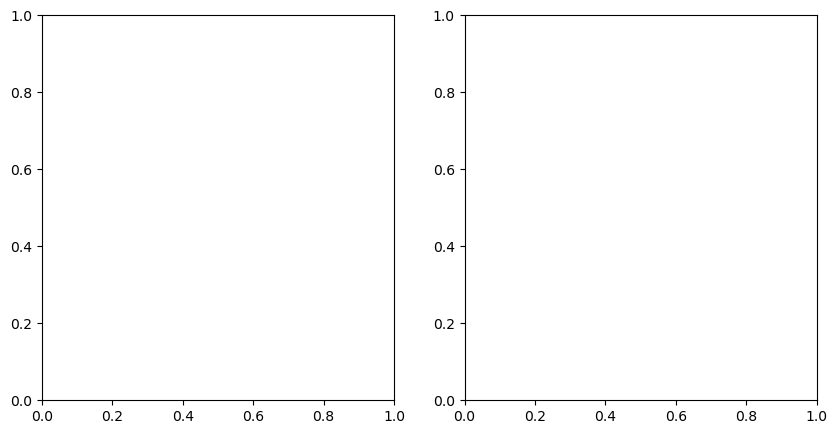

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(np.arange(1,14), pca.explained_variance_ratio_)
ax[0].set_xlabel("Principal component")
ax[0].set_title("Variance explained by each Principal Component")
ax[1].plot(np.arange(1,14),cumulated_explained_variance_ratio)
ax[1].set_title("Acumulated variance explained by Principal Components")
ax[1].set_xlabel("Number of Principal components")
plt.tight_layout()
plt.show()

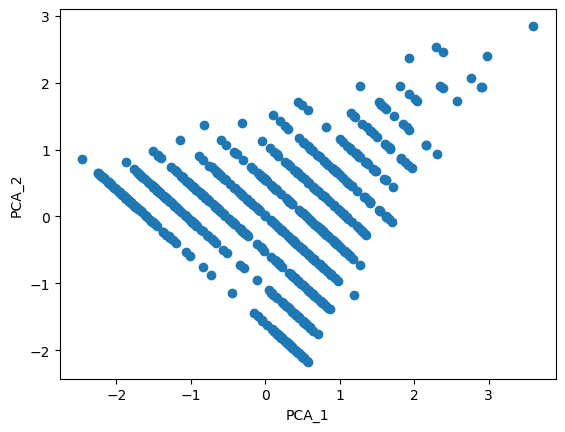

In [74]:
fig, ax = plt.subplots()
ax.scatter(principal_components_df['PCA_1'],principal_components_df['PCA_2'])
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
plt.show()

KeyError: 'PCA_3'

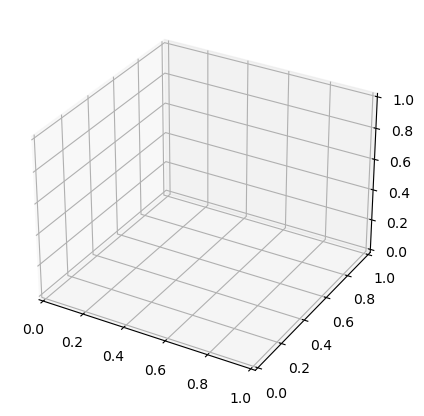

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components_df['PCA_1'],principal_components_df['PCA_2'], principal_components_df['PCA_3'])
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
#ax.set_zlabel("PCA_3")
plt.show()

In [77]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
#ISOMAP

from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=12, n_components=2)
iso.fit(X)
X_isomap_transformed = iso.transform(X)
X_isomap_transformed_df = pd.DataFrame(X_isomap_transformed, columns=["ISO_1","ISO_2"])
X_isomap_transformed_df.head()

In [79]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=12, n_components=2)
iso.fit(data2)
X_isomap_transformed = iso.transform(data2)
X_isomap_transformed_df = pd.DataFrame(X_isomap_transformed, columns=["ISO_1","ISO_2"])
X_isomap_transformed_df.head()

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 10 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/melanie/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/melanie/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/melanie/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

,ISO_1,ISO_2
0,-3.340388,-0.087922
1,-3.276761,-0.072531
2,-3.275918,-0.072327
3,-3.273575,-0.071760
4,-3.273201,-0.071670


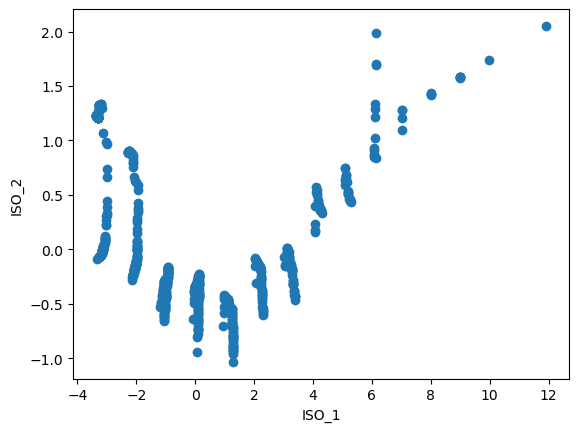

In [80]:
fig, ax = plt.subplots()
ax.scatter(X_isomap_transformed_df['ISO_1'],X_isomap_transformed_df['ISO_2'])
ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
plt.show()

In [ ]:
#t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, init='random', perplexity=40, random_state=12)

X_tsne_transformed = tsne.fit_transform(X)
X_tsne_transformed_df = pd.DataFrame(X_tsne_transformed, columns=["TSNE_1","TSNE_2"])
X_tsne_transformed_df.head()

In [82]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, init='random', perplexity=40, random_state=12)

X_tsne_transformed = tsne.fit_transform(data2)
X_tsne_transformed_df = pd.DataFrame(X_tsne_transformed, columns=["TSNE_1","TSNE_2"])
X_tsne_transformed_df.head()

,TSNE_1,TSNE_2
0,2.108912,-9.594791
1,1.798371,-9.198838
2,1.790289,-9.190631
3,1.772032,-9.163911
4,1.768763,-9.159619


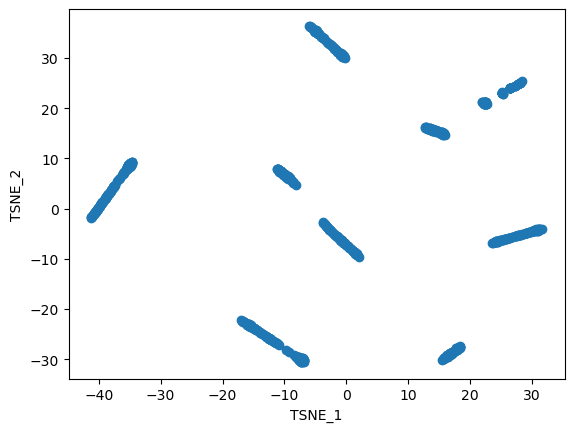

In [83]:
fig, ax = plt.subplots()
ax.scatter(X_tsne_transformed_df['TSNE_1'],X_tsne_transformed_df['TSNE_2'])
ax.set_xlabel("TSNE_1")
ax.set_ylabel("TSNE_2")
plt.show()

6.05_code_along_KMeans

In [87]:
data2 = data.groupby(['danceability']).agg({"valence": 'nunique'}).reset_index()
#data2.columns = ["year_added","number_of_movies"]
data2
data2.head()

,danceability,valence
0,0.0000,1
1,0.0679,1
2,0.0688,1
3,0.0713,1
4,0.0717,1


In [88]:
data2.shape

(730, 2)

In [ ]:
data['DESCR']

Clustering the wines with K-Means:

In [90]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=1234)

In [91]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index() # Number of wines in each cluster

0     91
1    121
2     91
3     94
4     28
5     90
6    138
7     77
dtype: int64

In [92]:
#X_df = pd.DataFrame(X)
data2["cluster"] = clusters
data2.head()

,danceability,valence,cluster
0,0.0000,1,1
1,0.0679,1,1
2,0.0688,1,1
3,0.0713,1,1
4,0.0717,1,1


In [93]:
data2[data2['cluster'] == 7].sample(5)

,danceability,valence,cluster
243,0.417,7,7
281,0.456,7,7
393,0.568,7,7
285,0.460,7,7
264,0.439,7,7


In [ ]:
# Determine the features of a "typical" wine of each cluster
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns[:-1])

In [94]:
# Determine the features of a "typical" wine of each cluster
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=data2.columns[:-1])

,danceability,valence
0,0.714078,5.666667
1,0.192613,1.462810
2,0.719484,3.362637
3,0.468568,5.084211
4,0.588321,11.321429
5,0.867400,1.511111
6,0.384101,2.688406
7,0.568481,7.844156


Playing with the parameters:

In [95]:
kmeans.inertia_

140.5462149849276

In [96]:
kmeans2 = KMeans(n_clusters=8, # Number of clusters/groups
                init="random",
                n_init=3, # Number starting locations for the centroids
                max_iter=2, # Maximum amount of times the centroid's locations are going to be updated (default value = 300)
                tol=0, # Maximum displacement of the centroid's location
                algorithm="full",
                random_state=1234)

kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

156.18730986957837


/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Chosing K:

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 1517.6947346683703.
Iteration 1, inertia 1051.8050226461266.
Iteration 2, inertia 950.8318156272001.
Iteration 3, inertia 936.2214675265423.
Iteration 4, inertia 930.4520609745359.
Iteration 5, inertia 928.8423326328525.
Iteration 6, inertia 928.6238355497987.
Iteration 7, inertia 928.2568474571868.
Iteration 8, inertia 927.499347246199.
Iteration 9, inertia 926.7108520479592.
Iteration 10, inertia 925.9680464744725.
Iteration 11, inertia 925.2686638790096.
Iteration 12, inertia 924.877285931618.
Iteration 13, inertia 924.4659646808134.
Iteration 14, inertia 923.806691148517.
Iteration 15, inertia 922.2261502001389.
Iteration 16, inertia 917.1901856839474.
Iteration 17, inertia 897.9079284433869.
Iteration 18, inertia 828.8252282779961.
Iteration 19, inertia 804.7849919913803.
Iteration 20, inertia 804.199117577694.
Iteration 21, inertia 804.0027264620458.
Iteration 22, inertia 803.9177255762818.
C

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 4, inertia 429.350847262006.
Iteration 5, inertia 425.5962762985557.
Iteration 6, inertia 424.5299786068754.
Iteration 7, inertia 424.32630898630464.
Iteration 8, inertia 424.27669615953954.
Converged at iteration 8: center shift 3.426181652774806e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 533.3658523113437.
Iteration 1, inertia 430.78908674922667.
Iteration 2, inertia 426.44905763663365.
Iteration 3, inertia 425.08949396451743.
Iteration 4, inertia 424.52610173435096.
Iteration 5, inertia 424.2991714868751.
Converged at iteration 5: center shift 9.489595631256042e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 601.0713356216361.
Iteration 1, inertia 460.65740047184033.
Iteration 2, inertia 440.60991813293117.
Iteration 3, inertia 431.0136968153625.
Iteration 4, inertia 426.9369677327708.
Iteration 5, inertia 425.17352549577197.
Iteration 6, inertia 424.5709513154978.
Iteration 7, inertia 4

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 3, inertia 332.45590478463737.
Iteration 4, inertia 321.80874797849395.
Iteration 5, inertia 314.2937912809131.
Iteration 6, inertia 309.96081406861316.
Iteration 7, inertia 307.9060721734455.
Iteration 8, inertia 307.7500878385605.
Iteration 9, inertia 307.6861277697399.
Iteration 10, inertia 307.6582990856604.
Converged at iteration 10: center shift 4.5979769601036885e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 439.87849247944246.
Iteration 1, inertia 323.2088163239231.
Iteration 2, inertia 322.18759021943674.
Iteration 3, inertia 321.94019206273384.
Iteration 4, inertia 321.5182269930806.
Iteration 5, inertia 320.91290858220816.
Iteration 6, inertia 320.3595994396016.
Iteration 7, inertia 319.9644080692934.
Iteration 8, inertia 319.4377326114184.
Iteration 9, inertia 319.17612294476027.
Iteration 10, inertia 318.8715876337975.
Iteration 11, inertia 318.68015626373887.
Iteration 12, inertia 318.4777693922704.
Iteration 13, inerti

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 11, inertia 238.40860715508043.
Iteration 12, inertia 238.00321026755955.
Iteration 13, inertia 237.92819112993027.
Converged at iteration 13: center shift 3.757998662387587e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 304.4239562908953.
Iteration 1, inertia 262.07891056329754.
Iteration 2, inertia 251.4054843387471.
Iteration 3, inertia 244.82066097061374.
Iteration 4, inertia 240.6850793357126.
Iteration 5, inertia 239.18836383499817.
Iteration 6, inertia 238.6249605898211.
Iteration 7, inertia 238.24795073161275.
Iteration 8, inertia 238.0216918732099.
Iteration 9, inertia 237.89023183133003.
Iteration 10, inertia 237.75873031529855.
Iteration 11, inertia 237.5900059669034.
Iteration 12, inertia 237.2610243059507.
Iteration 13, inertia 236.40363487109187.
Iteration 14, inertia 235.93364437613212.
Iteration 15, inertia 235.83278413683684.
Iteration 16, inertia 235.78039727826314.
Iteration 17, inertia 235.7209809737218.
Converged 

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 2, inertia 189.5606667621684.
Iteration 3, inertia 188.34101256414124.
Iteration 4, inertia 188.12091226700431.
Converged at iteration 4: center shift 5.771518748863034e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 256.4792260603064.
Iteration 1, inertia 196.71683193595246.
Iteration 2, inertia 192.84402435422976.
Iteration 3, inertia 191.2574304027111.
Iteration 4, inertia 190.344013056758.
Iteration 5, inertia 189.79005138806784.
Iteration 6, inertia 189.5558154596165.
Iteration 7, inertia 189.41787400087674.
Iteration 8, inertia 189.1873697488114.
Iteration 9, inertia 189.1448930065234.
Iteration 10, inertia 189.12832170574882.
Converged at iteration 10: center shift 3.6455350087674917e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 314.23011694014093.
Iteration 1, inertia 241.87097693549768.
Iteration 2, inertia 229.27963986664943.
Iteration 3, inertia 222.72801764872662.
Iteration 4, iner

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 8, inertia 165.80256457625063.
Iteration 9, inertia 163.79192927587803.
Iteration 10, inertia 162.85112607042976.
Iteration 11, inertia 162.52809341382675.
Iteration 12, inertia 162.1526315781365.
Iteration 13, inertia 161.9071032713619.
Iteration 14, inertia 161.2925971897205.
Iteration 15, inertia 160.83604749664744.
Iteration 16, inertia 160.629950178116.
Iteration 17, inertia 160.41451018349792.
Iteration 18, inertia 160.3476759514724.
Iteration 19, inertia 160.3302674588545.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 241.28015263447367.
Iteration 1, inertia 182.58098366578125.
Iteration 2, inertia 175.68960164484218.
Iteration 3, inertia 174.1631582316867.
Iteration 4, inertia 172.92292801884213.
Iteration 5, inertia 171.1740203346552.
Iteration 6, inertia 170.435913084661.
Iteration 7, inertia 170.3572121453024.
Converged at iteration 7: center shift 9.005577207401231e-05 within tolerance 9.999999999999984e-05.
Initializa

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 3, inertia 149.66599801993866.
Iteration 4, inertia 148.52183118728325.
Iteration 5, inertia 147.87371434750284.
Iteration 6, inertia 147.8121231172492.
Iteration 7, inertia 147.75610611054734.
Iteration 8, inertia 147.71252190393588.
Iteration 9, inertia 147.68238546819475.
Converged at iteration 9: center shift 5.817531483065996e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 215.8756744699217.
Iteration 1, inertia 160.55431547774543.
Iteration 2, inertia 152.85141263691128.
Iteration 3, inertia 149.6396503757676.
Iteration 4, inertia 147.79521273176002.
Iteration 5, inertia 146.1898430292055.
Iteration 6, inertia 145.35845461179173.
Iteration 7, inertia 145.10982109700805.
Iteration 8, inertia 144.9917314359767.
Iteration 9, inertia 144.9772629478807.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 248.52051418743275.
Iteration 1, inertia 202.77732059565085.
Iteration 2, inertia 189.3546447

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 166.96417177775288.
Iteration 1, inertia 140.5783539454045.
Iteration 2, inertia 134.73657519714726.
Iteration 3, inertia 133.6665420707253.
Iteration 4, inertia 133.4367184658784.
Iteration 5, inertia 133.1520422533771.
Iteration 6, inertia 132.93159118108196.
Iteration 7, inertia 132.83149652813935.
Iteration 8, inertia 132.70071701371697.
Iteration 9, inertia 132.5396046666253.
Iteration 10, inertia 132.4136134687745.
Iteration 11, inertia 132.3493639945016.
Iteration 12, inertia 132.30668039127318.
Iteration 13, inertia 132.2736457840719.
Converged at iteration 13: center shift 5.4639010016642595e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 181.1423898043831.
Iteration 1, inertia 135.1034945914402.
Iteration 2, inertia 129.50962901815797.
Iteration 3, inertia 127.51523734226399.
Iteration 4, inertia 126.7141976982419.
Iteration 5, inertia 126.21785036552727.
Iteration 6, inertia 125.81827607374

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 14, inertia 113.50827130580561.
Iteration 15, inertia 113.364236970876.
Iteration 16, inertia 112.490592659133.
Iteration 17, inertia 111.93335227964849.
Iteration 18, inertia 111.81038712658155.
Iteration 19, inertia 111.7880515722861.
Converged at iteration 19: center shift 3.208493508357331e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 175.29078497160629.
Iteration 1, inertia 137.09338712122732.
Iteration 2, inertia 132.62306098784657.
Iteration 3, inertia 128.81184971051897.
Iteration 4, inertia 126.71884706281628.
Iteration 5, inertia 125.3768511828111.
Iteration 6, inertia 124.39244748249615.
Iteration 7, inertia 123.19614949825889.
Iteration 8, inertia 122.96014135394681.
Iteration 9, inertia 122.92461507515746.
Iteration 10, inertia 122.85881995625685.
Iteration 11, inertia 122.83437456207751.
Iteration 12, inertia 122.78710302019445.
Iteration 13, inertia 122.75848233365336.
Iteration 14, inertia 122.75058408099405.
Converge

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 6, inertia 116.29379683610323.
Iteration 7, inertia 116.12357572459983.
Iteration 8, inertia 116.00972476965497.
Iteration 9, inertia 115.87512898953514.
Iteration 10, inertia 115.76387993555718.
Iteration 11, inertia 115.47943326572224.
Iteration 12, inertia 115.18914038418205.
Iteration 13, inertia 114.98621800033618.
Iteration 14, inertia 114.54492529435458.
Iteration 15, inertia 114.05729360289048.
Iteration 16, inertia 113.06038008059954.
Iteration 17, inertia 112.45496525368793.
Iteration 18, inertia 111.96249312567804.
Iteration 19, inertia 111.39159634132722.
Iteration 20, inertia 111.0275959728767.
Iteration 21, inertia 110.98719461833372.
Iteration 22, inertia 110.96813413056879.
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 151.7675514056226.
Iteration 1, inertia 117.77824673675126.
Iteration 2, inertia 113.03601850474216.
Iteration 3, inertia 112.1729373796532.
Iteration 4, inertia 112.00576380092866.
Iteration 5, iner

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 124.1936572113085.
Iteration 1, inertia 103.1051637320797.
Iteration 2, inertia 100.0092740866026.
Iteration 3, inertia 98.28130846583106.
Iteration 4, inertia 97.42073684935984.
Iteration 5, inertia 96.75113940543321.
Iteration 6, inertia 96.20870633928541.
Iteration 7, inertia 95.48816707214324.
Iteration 8, inertia 94.75528330465906.
Iteration 9, inertia 94.27685526261558.
Iteration 10, inertia 94.12206455140729.
Iteration 11, inertia 93.88443474749344.
Iteration 12, inertia 93.6356281307453.
Iteration 13, inertia 93.45830307752055.
Iteration 14, inertia 93.4022841262937.
Iteration 15, inertia 93.37840790296032.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 136.08665830821693.
Iteration 1, inertia 101.90890312509445.
Iteration 2, inertia 97.70327492774464.
Iteration 3, inertia 96.47477071692089.
Iteration 4, inertia 95.70450657789655.
Iteration 5, inertia 93.95525383788167.
Iteration 6, inertia 93.300097208711.
Itera

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 96.47212632708079.
Iteration 2, inertia 93.3218387184672.
Iteration 3, inertia 92.22287981310403.
Iteration 4, inertia 91.9063182488301.
Iteration 5, inertia 91.76877591521637.
Iteration 6, inertia 91.59312882159085.
Iteration 7, inertia 91.44442286509307.
Iteration 8, inertia 91.27886876057377.
Iteration 9, inertia 91.11518491218365.
Iteration 10, inertia 90.91636535933768.
Iteration 11, inertia 90.83289824163438.
Iteration 12, inertia 90.70920707349381.
Iteration 13, inertia 90.62207136588441.
Iteration 14, inertia 90.60713851513012.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 113.67144951804288.
Iteration 1, inertia 98.66849779123032.
Iteration 2, inertia 95.08122617551663.
Iteration 3, inertia 93.38589383165944.
Iteration 4, inertia 92.7652096886227.
Iteration 5, inertia 92.06222861390191.
Iteration 6, inertia 91.71985297521847.
Iteration 7, inertia 91.48859434468459.
Iteration 8, inertia 91.08301549336727.
Iterat

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 126.55502345791155.
Iteration 1, inertia 96.55917495985898.
Iteration 2, inertia 94.46243813310724.
Iteration 3, inertia 93.37644570750538.
Iteration 4, inertia 92.37032469368532.
Iteration 5, inertia 92.02001597698444.
Iteration 6, inertia 91.54542189290007.
Iteration 7, inertia 91.00054327991273.
Iteration 8, inertia 89.92364973772986.
Iteration 9, inertia 88.54970041554567.
Iteration 10, inertia 87.50954890253382.
Iteration 11, inertia 87.06663136814836.
Iteration 12, inertia 87.00905721631902.
Iteration 13, inertia 86.9463570906989.
Iteration 14, inertia 86.83119825969979.
Iteration 15, inertia 86.7592449486958.
Iteration 16, inertia 86.74003259418062.
Iteration 17, inertia 86.70209643114055.
Iteration 18, inertia 86.64688546083116.
Iteration 19, inertia 86.6204722820732.
Iteration 20, inertia 86.56620858830252.
Iteration 21, inertia 86.40711356195564.
Iteration 22, inertia 86.12908620786449.
Iteration 23, inertia 85.8338397730897.
Itera

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 11, inertia 80.9892003743308.
Iteration 12, inertia 80.96710230350463.
Iteration 13, inertia 80.94984569025604.
Iteration 14, inertia 80.92763100450304.
Iteration 15, inertia 80.89003419372054.
Iteration 16, inertia 80.839038264386.
Iteration 17, inertia 80.77137183231034.
Iteration 18, inertia 80.65538205820779.
Iteration 19, inertia 80.50081557794793.
Iteration 20, inertia 80.41709880152446.
Iteration 21, inertia 80.28243510379698.
Iteration 22, inertia 80.16651472536037.
Iteration 23, inertia 80.12229444645249.
Iteration 24, inertia 80.07328333672803.
Converged at iteration 24: center shift 8.157906229172821e-05 within tolerance 9.999999999999984e-05.
Initialization complete
Iteration 0, inertia 97.8599185926667.
Iteration 1, inertia 81.97991189751303.
Iteration 2, inertia 78.77194623061663.
Iteration 3, inertia 77.15384441674588.
Iteration 4, inertia 76.41962149856147.
Iteration 5, inertia 75.6568150342032.
Iteration 6, inertia 75.34645655149038.
Iteration 7, inertia 75.0

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 83.18550422742099.
Iteration 2, inertia 78.95779693253671.
Iteration 3, inertia 77.94514736398163.
Iteration 4, inertia 77.12306476493177.
Iteration 5, inertia 75.99375440084033.
Iteration 6, inertia 75.15456429403605.
Iteration 7, inertia 73.70730351196048.
Iteration 8, inertia 72.67356415652169.
Iteration 9, inertia 72.30298644168535.
Iteration 10, inertia 72.15562921690821.
Iteration 11, inertia 71.97538707087438.
Iteration 12, inertia 71.83786844846225.
Iteration 13, inertia 71.75271215631645.
Iteration 14, inertia 71.62466161354419.
Iteration 15, inertia 71.29968116419721.
Iteration 16, inertia 71.10831721426172.
Iteration 17, inertia 70.9356333141528.
Iteration 18, inertia 70.78734461274719.
Iteration 19, inertia 70.7298036552014.
Iteration 20, inertia 70.71228575601621.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 94.37392207195703.
Iteration 1, inertia 82.08505196011195.
Iteration 2, inertia 77.29660374263636.


/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 3, inertia 69.38800978482915.
Iteration 4, inertia 68.56894283577945.
Iteration 5, inertia 68.20542364851553.
Iteration 6, inertia 68.081755840824.
Iteration 7, inertia 67.91716645399488.
Iteration 8, inertia 67.58918840181929.
Iteration 9, inertia 67.02977569968533.
Iteration 10, inertia 66.14133451998316.
Iteration 11, inertia 65.68572321007059.
Iteration 12, inertia 65.51028430121758.
Iteration 13, inertia 65.35594222789115.
Iteration 14, inertia 65.3038793388218.
Iteration 15, inertia 65.25959503242534.
Iteration 16, inertia 65.22882686564947.
Iteration 17, inertia 65.15722774120067.
Iteration 18, inertia 65.12498710797205.
Iteration 19, inertia 65.10918851359054.
Iteration 20, inertia 65.08800494049152.
Iteration 21, inertia 65.08063251359467.
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 93.63798642228852.
Iteration 1, inertia 76.42956564944222.
Iteration 2, inertia 72.62244132708487.
Iteration 3, inertia 69.90636376808035.


/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 6, inertia 62.92889491642047.
Iteration 7, inertia 62.64144632603687.
Iteration 8, inertia 62.176077417369875.
Iteration 9, inertia 61.73408036285628.
Iteration 10, inertia 61.70213963879973.
Iteration 11, inertia 61.694159882214365.
Iteration 12, inertia 61.685124164315496.
Iteration 13, inertia 61.659830032205065.
Iteration 14, inertia 61.6301306250664.
Iteration 15, inertia 61.62502185359425.
Iteration 16, inertia 61.619190388659376.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 88.94885787120049.
Iteration 1, inertia 71.5765280197124.
Iteration 2, inertia 69.2897730475177.
Iteration 3, inertia 68.33519905697514.
Iteration 4, inertia 68.08156341188104.
Iteration 5, inertia 67.87933087453567.
Iteration 6, inertia 67.84713152660538.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 85.5030099544691.
Iteration 1, inertia 71.61282297785179.
Iteration 2, inertia 66.97653424928409.
Iteration 3

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 9, inertia 60.3495410374768.
Iteration 10, inertia 60.333475239806106.
Iteration 11, inertia 60.307266987611015.
Iteration 12, inertia 60.28176590143207.
Iteration 13, inertia 60.12957700259287.
Iteration 14, inertia 59.60563031747173.
Iteration 15, inertia 59.47844153910033.
Iteration 16, inertia 59.395933500939734.
Iteration 17, inertia 59.10492349927448.
Iteration 18, inertia 58.62377848791769.
Iteration 19, inertia 58.54417241102669.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 80.91471164740007.
Iteration 1, inertia 70.54007550394088.
Iteration 2, inertia 63.6822775809728.
Iteration 3, inertia 61.848369016355676.
Iteration 4, inertia 60.646313398243876.
Iteration 5, inertia 60.07995245811104.
Iteration 6, inertia 59.75400884506948.
Iteration 7, inertia 59.6688679958567.
Iteration 8, inertia 59.581476862184275.
Iteration 9, inertia 59.41016017154685.
Iteration 10, inertia 59.35010962336732.
Iteration 11, inertia 59.3181635136

/Users/melanie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 7, inertia 55.28225297677152.
Iteration 8, inertia 55.21419045273397.
Iteration 9, inertia 55.131453851384634.
Iteration 10, inertia 55.04532918217154.
Iteration 11, inertia 55.01927446561771.
Iteration 12, inertia 54.998125858733346.
Iteration 13, inertia 54.94726532511177.
Iteration 14, inertia 54.94215551105586.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 80.71220533312444.
Iteration 1, inertia 61.55050691047477.
Iteration 2, inertia 58.03291136240137.
Iteration 3, inertia 57.03591310139508.
Iteration 4, inertia 56.575574697591044.
Iteration 5, inertia 55.88951384424442.
Iteration 6, inertia 55.44887529658958.
Iteration 7, inertia 55.300015002256174.
Iteration 8, inertia 55.25883520897399.
Iteration 9, inertia 55.23254827226333.
Iteration 10, inertia 55.21494635540509.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 82.69866369746275.
Iteration 1, inertia 67.92806889147614.
Iteratio

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

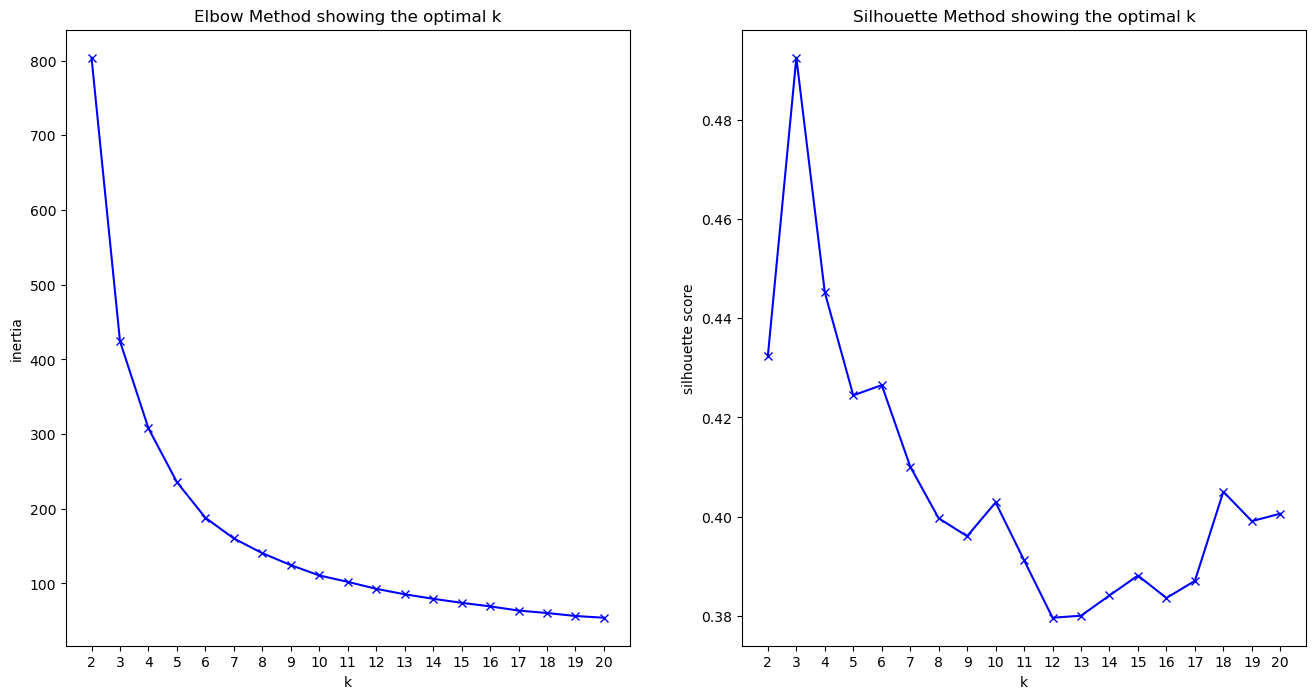

In [113]:
K = range(2, 21)
#K = range(2, 35)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)

    filename = "/Users/melanie/Ironhack/Week_6/Song_recommender/lab-clustering-songs/kmeans_" + str(k) + ".pickle" # Path with filename # kmeans_n.pickle
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

Silouhette

Loading the scaler and the best model:

In [98]:
def load(filename = "filename.pickle"):
    try:
        with open(filename, "rb") as file:
            return pickle.load(file)
    except FileNotFoundError:
        print("File not found!")

In [99]:
scaler2 = load("/Users/melanie/Ironhack/Week_6/Song_recommender/lab-clustering-songs/scaler.pickle")
scaler2

File not found!


In [100]:
best_model = load("Users/melanie/Ironhack/Week_6/Song_recommender/lab-clustering-songs/kmeans_3.pickle")

File not found!


In [101]:
best_model.predict(X_scaled_df)

AttributeError: 'NoneType' object has no attribute 'predict'

In [102]:
#new_wine_features_scaled = scaler2.transform(new_wine_features)
not_hot_features_scaled = scaler2.transform(not_hot_features)

AttributeError: 'NoneType' object has no attribute 'transform'

In [103]:
#best_model.predict(new_wine_features_scaled)
best_model.predict(not_hot_features)

AttributeError: 'NoneType' object has no attribute 'predict'

6.05 code-along-HDBSCAN_students:

In [29]:
X_df = pd.read_csv("test_not_hot.csv")

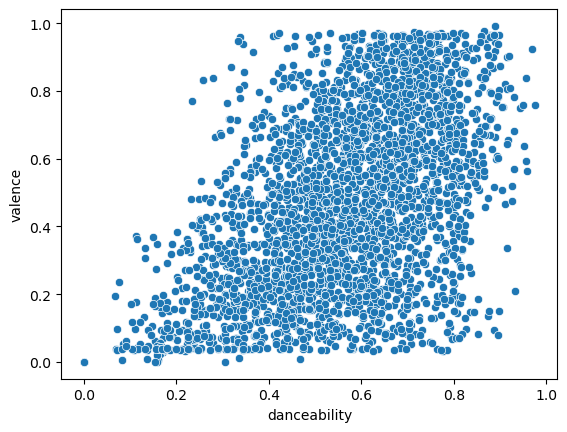

In [30]:
sns.scatterplot(data=X_df, x="danceability", y="valence");

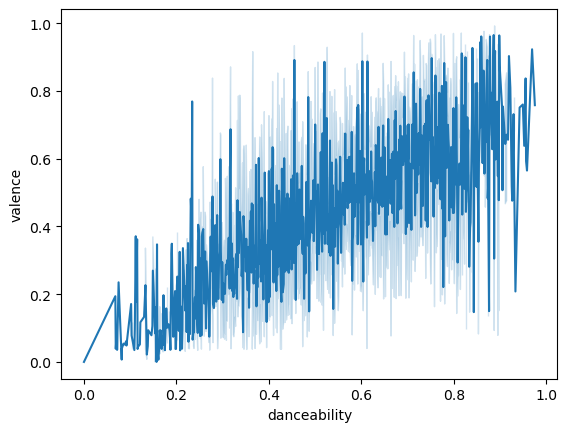

In [31]:
sns.lineplot(data=X_df, x="danceability", y="valence");

First Model:

In [ ]:
# Scaling features
scaler = StandardScaler()
scaler.fit(X_df)
X_scaled_np = scaler.transform(X_df)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=X_df.columns)

# Creating the clustering model
model = HDBSCAN() # Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
yhat = model.fit_predict(X_scaled_df) # .fit(X_scaled_df)

In [33]:
# Scaling features
scaler = StandardScaler()
scaler.fit(data2)
X_scaled_np = scaler.transform(data2)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=data2.columns)

# Creating the clustering model
model = HDBSCAN() # Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
yhat = model.fit_predict(X_scaled_df) # .fit(X_scaled_df)

In [ ]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))
print("The Calinksi-Harabasz score of the model is: ",round(calinski_harabasz_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

In [34]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))
print("The Calinksi-Harabasz score of the model is: ",round(calinski_harabasz_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

The Silhouette score of the model is:  0.16
The Calinksi-Harabasz score of the model is:  49.63


In [35]:
yhat

array([-1, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, -1, -1, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, -1, -1, 23, 23, -1, -1, 20, 20, -1, -1,
       -1, -1, 20, 34, 20, 20, -1, -1, 34, -1, 20, 34, 20, 34, 34, -1, 35,
       20, 35, 35, 35, 35, 35, 35, 35, 35, 35, -1, 35, 20, 35, 35, 35, 35,
       35, -1, -1, 24, -1, 24, 24, 24, 28, 24, 24, 28, -1, 24, 28, 24, 28,
       28, 28, 28, -1, 24, 24, 24, 24, 28,  5, 24, 24, -1, 24, 24, -1, -1,
       -1, -1, 24, -1, -1, -1,  5, -1, 24, 24, 24, -1, 24, 24, -1, 24, -1,
       -1, 24, 24, 11, 32, 32, 24, 24, 32,  5, 11, 32, 24, 24, 32, 11,  5,
       32, 11, 24, -1, 11, 32, 32, 32, 11, -1, 24,  5, 11, 32, -1, 24, 24,
       32, 32, -1,  5, -1,  5,  5, 24, 33, -1, -1, 24,  5,  5, -1,  5, 33,
       24, 33,  5,  3, 33, -1, 33, 33, -1,  7,  7, 33, 33,  5, 25, 25,  5,
       -1, 33, 25,  5, 25,  7, 33, 33, 33, 25, -1, 33, -1,  7, 33, 33,  7,
       33,  5,  7,  3, 25, -1, 25, 25, 25, 25, 25, 25, 29,  7, 25, -1, 25,
       25,  5, 25,  3,  5

In [36]:
X_df['cluster'] = yhat
X_df.head()

ValueError: Length of values (730) does not match length of index (2997)

In [37]:
# retrieve unique clusters
clusters = np.unique(yhat)
clusters # DBSCAN flags with "-1" noisy data.

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35])

In [38]:
[cluster for cluster in list(clusters) if cluster != -1]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

In [39]:
# Number of clusters (excluding noise points)
clusters.size - 1

36

In [ ]:
X_scaled_df["cluster"] = yhat
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette = sns.color_palette(cc.glasbey, n_colors=clusters.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1"
custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(clusters,custom_palette)]
sns.scatterplot(X_scaled_df, x="X1", y="X2", hue="cluster", palette=custom_palette);
plt.show()

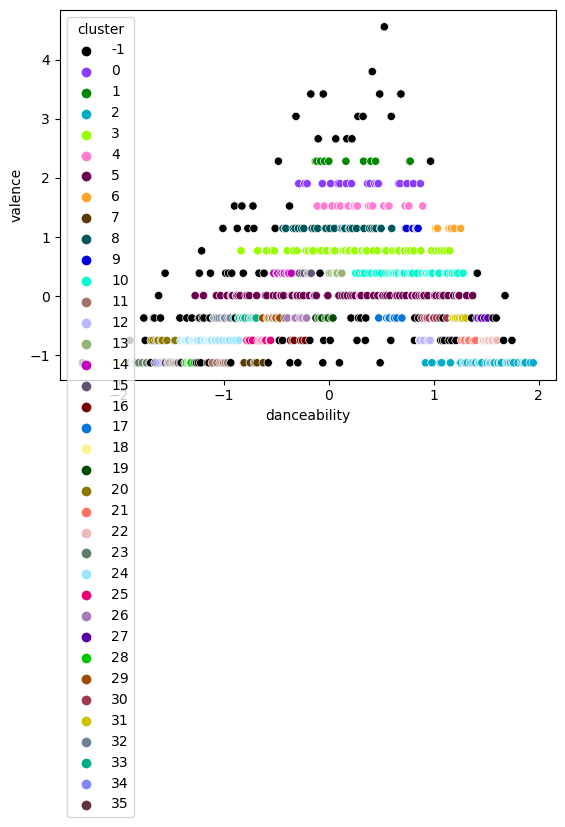

In [41]:
X_scaled_df["cluster"] = yhat
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette = sns.color_palette(cc.glasbey, n_colors=clusters.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1"
custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(clusters,custom_palette)]
sns.scatterplot(X_scaled_df, x="danceability", y="valence", hue="cluster", palette=custom_palette);
plt.show()

In [42]:
file = "./hdbscan.pkl"

with open(file, "wb") as file:
    pickle.dump(model, file)

DBCV Score:

In [43]:
%pwd

'/Users/melanie/Ironhack/Week_6/Song_recommender/lab-clustering-songs'

In [44]:
file = "./hdbscan.pkl"

with open(file, "wb") as file:
    pickle.dump(model, file)

In [45]:
dbcv_score = round(DBCV(X_scaled_df.iloc[:,:2].to_numpy(), yhat, dist_function=euclidean))
print("The DBCV score is {:.2f}".format(dbcv_score))

NameError: name 'DBCV' is not defined

In [ ]:
# 1) get_user_song_cluster() 
# 2.1) reduce_features_of_user_song() <--
# 2.2) get_user_song_cluster <--

In [ ]:
# Add cluster column to dataset?
